In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Modellierung & Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Dataset laden
df = pd.read_csv("data/airline_review.csv")  # ggf. Pfad anpassen
print(df.head())
print(df.info())

   Unnamed: 0   Airline Name Overall_Rating  \
0           0    AB Aviation              9   
1           1    AB Aviation              1   
2           2    AB Aviation              1   
3           3  Adria Airways              1   
4           4  Adria Airways              1   

                            Review_Title          Review Date  Verified  \
0                "pretty decent airline"   11th November 2019      True   
1                   "Not a good airline"       25th June 2019      True   
2         "flight was fortunately short"       25th June 2019      True   
3    "I will never fly again with Adria"  28th September 2019     False   
4  "it ruined our last days of holidays"  24th September 2019      True   

                                              Review       Aircraft  \
0    Moroni to Moheli. Turned out to be a pretty ...            NaN   
1   Moroni to Anjouan. It is a very small airline...           E120   
2    Anjouan to Dzaoudzi. A very small airline an... 

In [21]:
# Überblick über fehlende Werte
print(df.isnull().sum())

# Zielvariable: 'recommended' oder 'overall' (je nach Fragestellung)
# Hier z.B. Binary-Klassifikation aus Gesamtbewertung ableiten
df['Overall_Rating'] = pd.to_numeric(df['Overall_Rating'], errors='coerce')
df['satisfied'] = df['Overall_Rating'].apply(lambda x: 1 if x >= 7 else 0)

# Kategorische Variablen erkennen
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# Label-Encoding für einfache Kategorien (später evtl. OneHot)
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))

# Features & Target
features = df.drop(columns=['Overall_Rating', 'satisfied'])
target = df['satisfied']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Skalierung (optional bei Entscheidbäumen, empfohlen für andere Modelle)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Unnamed: 0                    0
Airline Name                  0
Overall_Rating                0
Review_Title                  0
Review Date                   0
Verified                      0
Review                        0
Aircraft                  16042
Type Of Traveller          3738
Seat Type                  1096
Route                      3828
Date Flown                 3754
Seat Comfort               4155
Cabin Staff Service        4260
Food & Beverages           8671
Ground Service             4793
Inflight Entertainment    12342
Wifi & Connectivity       17251
Value For Money            1066
Recommended                   0
dtype: int64


              precision    recall  f1-score   support

           0       0.95      0.93      0.94      3687
           1       0.74      0.81      0.77       948

    accuracy                           0.90      4635
   macro avg       0.84      0.87      0.86      4635
weighted avg       0.91      0.90      0.90      4635



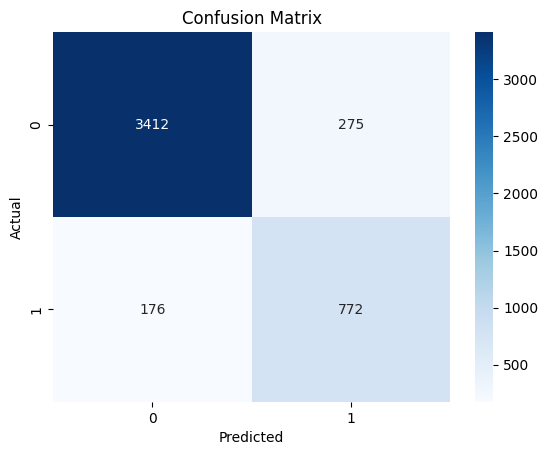

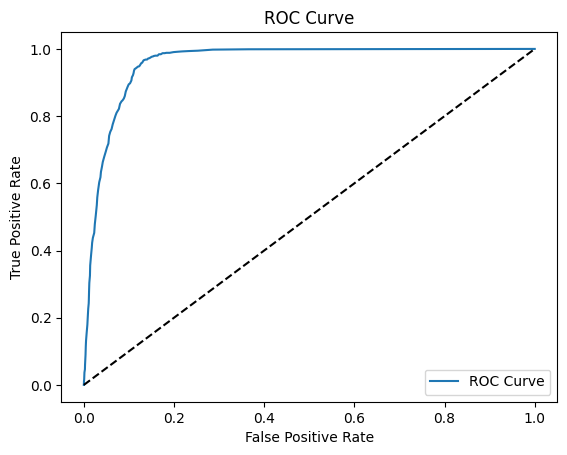

In [22]:
# Beispielmodell: Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Vorhersage
y_pred = model.predict(X_test_scaled)

# Evaluation
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
y_proba = model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

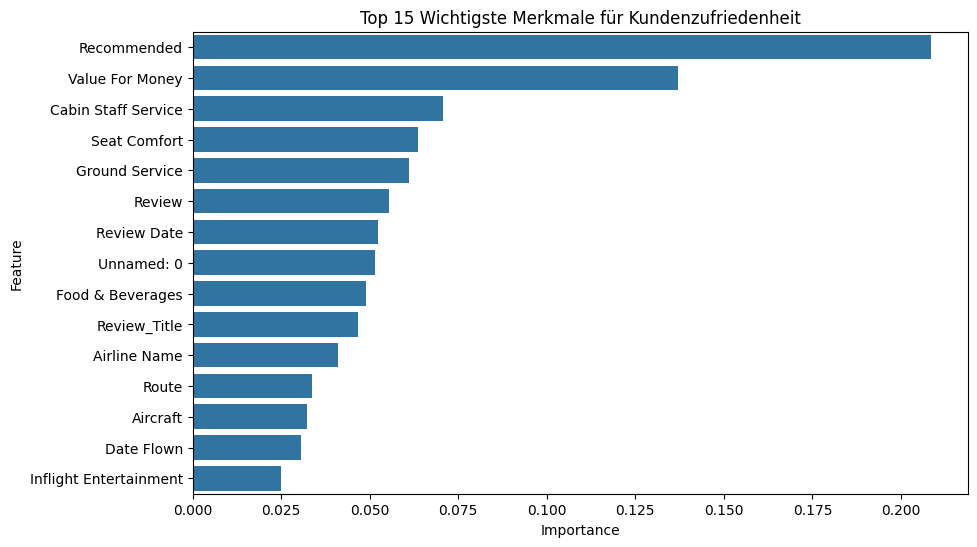

In [23]:
# Feature Importance Plot
importances = model.feature_importances_
feat_names = features.columns
feat_importance_df = pd.DataFrame({"Feature": feat_names, "Importance": importances})
feat_importance_df.sort_values(by="Importance", ascending=False, inplace=True)

plt.figure(figsize=(10,6))
sns.barplot(data=feat_importance_df.head(15), x="Importance", y="Feature")
plt.title("Top 15 Wichtigste Merkmale für Kundenzufriedenheit")
plt.show()

In [24]:
from sklearn.metrics import recall_score

recall_unzufrieden = recall_score(y_test, y_pred, pos_label=0)
print(f"Recall für unzufriedene Kunden: {recall_unzufrieden:.2f}")

Recall für unzufriedene Kunden: 0.93
